# Explorative data analysis on Ropecon 2022 data

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from read_data import read_data, get_all_usernames
from datetime import datetime, timedelta
%matplotlib widget

In [2]:
signedGames = read_data('users')
userSignups = read_data('signups')
results = read_data('results')
games = read_data('games')
usernames = get_all_usernames()

In [3]:
signedGames.head()

,priority,time,gameDetails.gameId,username,userGroup,serial,groupCode,createdAt,updatedAt
0,1,2022-07-31T07:00:00Z,p5349,794300,user,6624939010,0,2022-07-29T11:13:42.151Z,2022-07-31T08:00:37.262Z
1,1,2022-07-31T10:00:00Z,p5351,794300,user,6624939010,0,2022-07-29T11:13:42.151Z,2022-07-31T08:00:37.262Z
2,1,2022-07-30T14:00:00Z,p5671,74166,user,1926604032,0,2022-07-29T12:00:34.568Z,2022-07-30T16:00:34.809Z
3,3,2022-07-30T07:00:00Z,p5171,74166,user,1926604032,0,2022-07-29T12:00:34.568Z,2022-07-30T16:00:34.809Z
4,1,2022-07-30T07:00:00Z,p5575,74166,user,1926604032,0,2022-07-29T12:00:34.568Z,2022-07-30T16:00:34.809Z


In [4]:
userSignups.head()

,username,priority,time,message,game.gameId,count,createdAt,updatedAt
0,815795,0,2022-07-30T09:00:00Z,<redacted>,p5344,28,2022-07-28T17:50:57.929Z,2022-07-30T08:50:55.253Z
1,129921,0,2022-07-30T09:00:00Z,<redacted>,p5344,28,2022-07-28T17:50:57.929Z,2022-07-30T08:50:55.253Z
2,87501,0,2022-07-30T09:00:00Z,<redacted>,p5344,28,2022-07-28T17:50:57.929Z,2022-07-30T08:50:55.253Z
3,987073,0,2022-07-30T09:00:00Z,<redacted>,p5344,28,2022-07-28T17:50:57.929Z,2022-07-30T08:50:55.253Z
4,375661,0,2022-07-30T09:00:00Z,<redacted>,p5344,28,2022-07-28T17:50:57.929Z,2022-07-30T08:50:55.253Z


In [5]:
len(userSignups.username.unique())

666

In [6]:
results.head()

,username,enteredGame.gameDetails.gameId,enteredGame.priority,enteredGame.time,startTime,algorithm,message,updatedAt,createdAt
0,804595,p5263,3,2022-07-29T15:00:00Z,2022-07-29T15:00:00Z,padg,"Padg Assign Result - Players: 8/12 (67%), Game...",2022-07-29T13:00:10.946Z,2022-07-29T13:00:10.946Z
1,451394,p5263,2,2022-07-29T15:00:00Z,2022-07-29T15:00:00Z,padg,"Padg Assign Result - Players: 8/12 (67%), Game...",2022-07-29T13:00:10.946Z,2022-07-29T13:00:10.946Z
2,799060,p5414,3,2022-07-29T15:00:00Z,2022-07-29T15:00:00Z,padg,"Padg Assign Result - Players: 8/12 (67%), Game...",2022-07-29T13:00:10.946Z,2022-07-29T13:00:10.946Z
3,254323,p5414,1,2022-07-29T15:00:00Z,2022-07-29T15:00:00Z,padg,"Padg Assign Result - Players: 8/12 (67%), Game...",2022-07-29T13:00:10.946Z,2022-07-29T13:00:10.946Z
4,99090,p5664,1,2022-07-29T15:00:00Z,2022-07-29T15:00:00Z,padg,"Padg Assign Result - Players: 8/12 (67%), Game...",2022-07-29T13:00:10.946Z,2022-07-29T13:00:10.946Z


In [7]:
games.head()

,gameId,accessibilityValues,contentWarnings,createdAt,description,endTime,gameSystem,genres,language,location,...,people,popularity,programType,revolvingDoor,shortDescription,startTime,styles,tags,title,updatedAt
0,p5081,[remainingOnePlace],,2022-07-17T19:54:20.195Z,Nyt pääsevät haasteesta kiinnostuneet Commande...,2022-07-29T19:00:00Z,Magic the Gathering (Formaatti: Commander),[],fi,Halli 3 Turnaussali,...,"Arno Laine, Valtteri Hyyppä",0,tournament,False,,2022-07-29T13:00:00Z,[],"[inEnglish, forAdults, tournament]",Magic the Gathering: Commander (cEDH) Double E...,2022-08-02T13:00:04.587Z
1,p5644,[],Vampires,2022-07-17T19:54:20.194Z,"No longer actually a qualifier, but we're keep...",2022-07-29T14:30:00Z,Vampire: The Eternal Struggle (VTES),[],fi,Sali 208,...,,0,tournament,False,,2022-07-29T06:30:00Z,[],"[inEnglish, tournament]",VTES: Last Chance Qualifier (LCQ),2022-08-02T13:00:04.587Z
2,p5659,[],Vampyyrit | Vampires,2022-07-17T19:54:20.195Z,HUOMAA ETTÄ PERJANTAIN ALOITTELIJATURNAUS TURN...,2022-07-29T14:00:00Z,Vampire: The Eternal Struggle (VTES),[],fi,Sali 208,...,,0,tournament,False,,2022-07-29T06:30:00Z,[],"[inEnglish, beginnerFriendly, tournament]",VTES: Perjantain aloittelijaturnaus | VTES: Be...,2022-08-02T13:00:04.586Z
3,p5117,[],"väkivalta, kuolema",2022-07-17T19:54:20.195Z,Pelaajat ovat matkalla jättien maassa yhdessä ...,2022-07-29T17:00:00Z,D&D 5e,[],fi,Lehdistötila,...,Jani Hiltunen,0,tabletopRPG,False,"Taistelupainotteinen seikkailu D&Dllä, jossa y...",2022-07-29T13:00:00Z,"[light, rulesHeavy, characterDriven, combatDri...","[forAdults, beginnerFriendly, themeFriendship]",D&D Scamatania Kääpiö jättien maassa,2022-08-02T13:00:04.587Z
4,p4867,[],,2022-07-17T19:54:20.195Z,Viisi Koboldia Trenssitakissa on hassuttelupel...,2022-07-29T17:00:00Z,D&D 5E,[],fi,Mesta,...,"Sisko ""sieppeli"" Turunen",0,tabletopRPG,False,D&D 5E kaupunkipeli yhdellä hahmoluokalla/D&D ...,2022-07-29T13:00:00Z,"[light, rulesLight, characterDriven]","[beginnerFriendly, themeFriendship]",Viisi Koboldia Trenssitakissa/Five Kobolds in ...,2022-08-02T13:00:04.587Z


### New dataframes that consist only tabletop RPGs

In [8]:
ttrpg = games[games.programType=='tabletopRPG'].gameId.to_list()
signups_ttrpg = userSignups[userSignups['game.gameId'].isin(ttrpg)]
signedGames_ttrpg = signedGames[signedGames['gameDetails.gameId'].isin(ttrpg)]

games_ttrpg = games[games.programType == 'tabletopRPG']

### Add datetime in UTC+2 to each ttrpg dataframe

In [9]:
signups_ttrpg = signups_ttrpg.assign(datetime=lambda x: [datetime.strptime(d, r'%Y-%m-%dT%H:%M:%SZ')+timedelta(hours=2) for d in signups_ttrpg.time])

In [10]:
signedGames_ttrpg = signedGames_ttrpg.assign(datetime=lambda x: [datetime.strptime(d, r'%Y-%m-%dT%H:%M:%SZ')+timedelta(hours=2) for d in signedGames_ttrpg.time])

In [11]:
results = results.assign(datetime=lambda x: [datetime.strptime(d, r'%Y-%m-%dT%H:%M:%SZ')+timedelta(hours=2) for d in results.startTime])

In [12]:
games_ttrpg = games_ttrpg.assign(datetime=lambda x: [datetime.strptime(d, r'%Y-%m-%dT%H:%M:%SZ')+timedelta(hours=2) for d in games_ttrpg.startTime])

## How many players registered to Konsti but didn't sign to any game

In [13]:
users_with_no_games_all = []
for user in usernames:
    num_signups = signedGames[signedGames.username==user].shape[0]
    if num_signups == 0:
        users_with_no_games_all.append(user)

In [14]:
print(f'{len(users_with_no_games_all)} ({np.round(len(users_with_no_games_all)/len(usernames)*100,1)}%) did not sign to any game in any format')

503 (46.6%) did not sign to any game in any format


## How many players didn't get to any game, on average how many games they signed up for

In [15]:
# First find those usernames that did not get to any games
users_with_no_games = []
for user in usernames:
    num_signups = signups_ttrpg[signups_ttrpg.username==user].shape[0]
    if num_signups == 0:
        users_with_no_games.append(user)

In [16]:
signups_ttrpg.groupby(by='username').count().shape[0]

576

In [17]:
len(usernames)

1080

In [18]:
len(users_with_no_games)/len(usernames)*100

46.666666666666664

In [19]:
# Find those players that have tried to signup for a game
users_atleast_one_signedGame = signedGames_ttrpg.username.unique()
users_no_games_and_atleast_one_signedGame = set(users_with_no_games).intersection(set(users_atleast_one_signedGame))

In [20]:
print(f"{np.round(len(users_no_games_and_atleast_one_signedGame)/len(usernames)*100,1)}% ({len(users_no_games_and_atleast_one_signedGame)}) tried to signup for a game but didn't get to play")

12.4% (134) tried to signup for a game but didn't get to play


In [21]:
# Calculate the average number of signedGames per user that didn't play but tried at least once
num_signedGames = np.zeros((len(users_no_games_and_atleast_one_signedGame),))
for i, user in enumerate(users_no_games_and_atleast_one_signedGame):
    num_signedGames[i] = signedGames_ttrpg[signedGames_ttrpg['username'] == user].shape[0]

In [22]:
print(f"On average users that didn't get to play but tried atleast once tried to enter {np.round(num_signedGames.mean(),1)} games")

On average users that didn't get to play but tried atleast once tried to enter 2.4 games


In [23]:
print(f"{len(num_signedGames[num_signedGames==num_signedGames.max()])} users tried to enter {int(num_signedGames.max())} games and didn't get to play (maximum)")

4 users tried to enter 11 games and didn't get to play (maximum)


In [24]:
print(f"{len(num_signedGames[num_signedGames==1])} users tried to enter 1 game and didn't get to play (minimum)")

64 users tried to enter 1 game and didn't get to play (minimum)


## How many games players signed to on average

In [25]:
num_signedGames_all = np.zeros(len(users_atleast_one_signedGame,))
for i, user in enumerate(users_atleast_one_signedGame):
    num_signedGames_all[i] = signedGames_ttrpg[signedGames_ttrpg['username'] == user].shape[0]

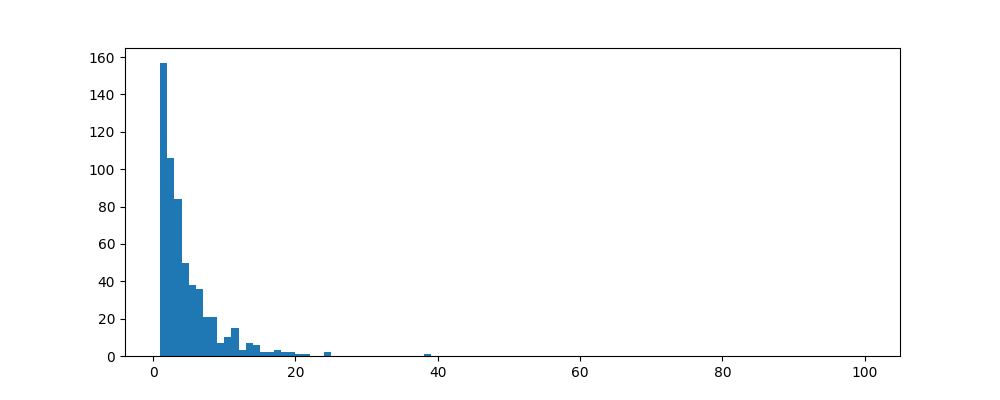

In [26]:
fig, ax = plt.subplots(figsize=(10,4))
counts, bins, bars = ax.hist(num_signedGames_all, bins=np.linspace(1,100,100))

In [27]:
print(f'On average players signed to {np.round(np.mean(num_signedGames_all),1)} games')

On average players signed to 4.2 games


In [28]:
print(f'Median of signed games {np.round(np.median(num_signedGames_all),1)} games')

Median of signed games 3.0 games


## What is the probability to be placed in a game as a function of number of signed games

In [29]:
signedGames_total = np.linspace(1,20,20)
chance_no_game = np.zeros((signedGames_total.shape))
for i,n in enumerate(signedGames_total):
    chance_no_game[i] = len(num_signedGames[num_signedGames==n])/len(num_signedGames_all[num_signedGames_all==n])

chance_no_game

array([0.40764331, 0.31132075, 0.17857143, 0.16      , 0.07894737,
       0.05555556, 0.0952381 , 0.14285714, 0.        , 0.        ,
       0.26666667, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

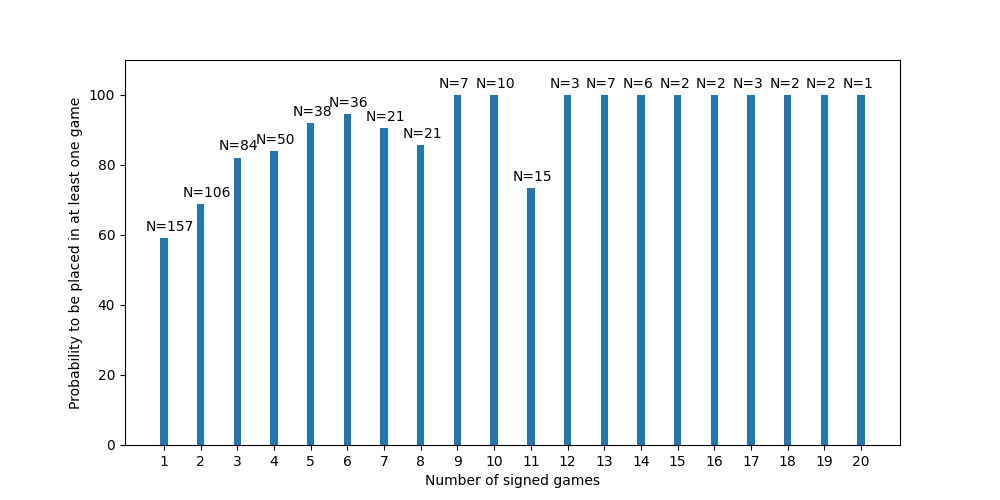

In [30]:
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(signedGames_total, (1-chance_no_game)*100, width=0.2)
ax.set_xlabel('Number of signed games')
ax.set_ylabel('Probability to be placed in at least one game')
ax.set_xticks(np.linspace(1,20,20))
ax.set_ylim([0, 110])
for i,n in enumerate(signedGames_total):
    ax.text(n-0.5, (1-chance_no_game[i])*100 + 2, f'N={len(num_signedGames_all[num_signedGames_all==n])}')

## What's the distribution of entered games

In [31]:
signups_ttrpg.head()

,username,priority,time,message,game.gameId,count,createdAt,updatedAt,datetime
0,815795,0,2022-07-30T09:00:00Z,<redacted>,p5344,28,2022-07-28T17:50:57.929Z,2022-07-30T08:50:55.253Z,2022-07-30 11:00:00
1,129921,0,2022-07-30T09:00:00Z,<redacted>,p5344,28,2022-07-28T17:50:57.929Z,2022-07-30T08:50:55.253Z,2022-07-30 11:00:00
2,87501,0,2022-07-30T09:00:00Z,<redacted>,p5344,28,2022-07-28T17:50:57.929Z,2022-07-30T08:50:55.253Z,2022-07-30 11:00:00
3,987073,0,2022-07-30T09:00:00Z,<redacted>,p5344,28,2022-07-28T17:50:57.929Z,2022-07-30T08:50:55.253Z,2022-07-30 11:00:00
4,375661,0,2022-07-30T09:00:00Z,<redacted>,p5344,28,2022-07-28T17:50:57.929Z,2022-07-30T08:50:55.253Z,2022-07-30 11:00:00


In [33]:
users_signup_ttrpg = signups_ttrpg.username.unique()

In [34]:
num_enteredGames = []
for user in users_signup_ttrpg:
    num_enteredGames.append(signups_ttrpg[signups_ttrpg.username==user].shape[0])
np.mean(num_enteredGames)

1.6128472222222223

Text(0, 0.5, 'Number of players')

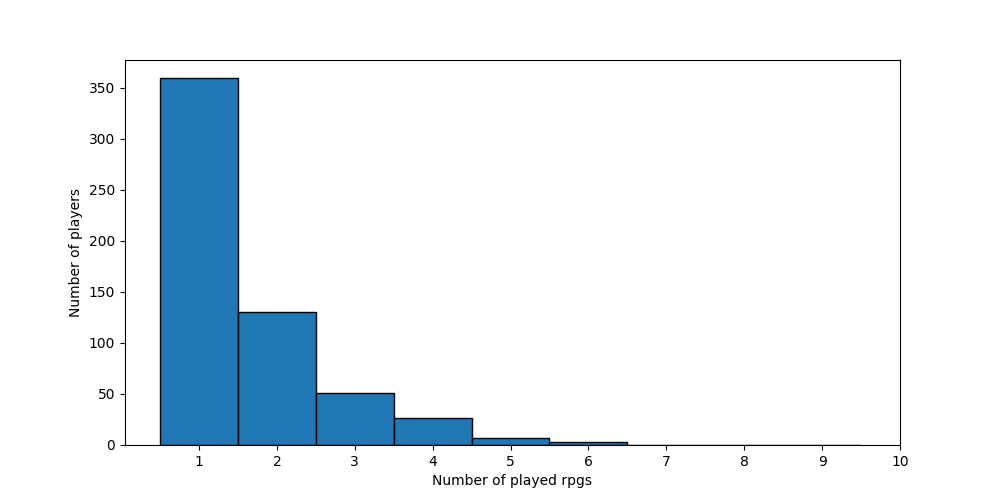

In [35]:
fig, ax = plt.subplots(figsize=(10,5))

counts, bins, bars = ax.hist(num_enteredGames, bins = np.linspace(1,10,10), linewidth=1, edgecolor='k')
ax.set_xticks(np.linspace(1,10,10)+0.5)
ax.set_xticklabels(np.linspace(1,10,10, dtype=int))
ax.set_xlabel('Number of played rpgs')
ax.set_ylabel('Number of players')

In [36]:
print(f'On average players played {np.round(np.mean(num_enteredGames),1)} games')
print(f'On median players played {np.round(np.median(num_enteredGames),1)} games')
max_games = int(np.max(num_enteredGames))
print(f'On maximum {int(counts[bins[:-1] == max_games][0])} players played {max_games} games')

On average players played 1.6 games
On median players played 1.0 games
On maximum 3 players played 6 games


### Find out how many games these 3 players signed for who played 6 games

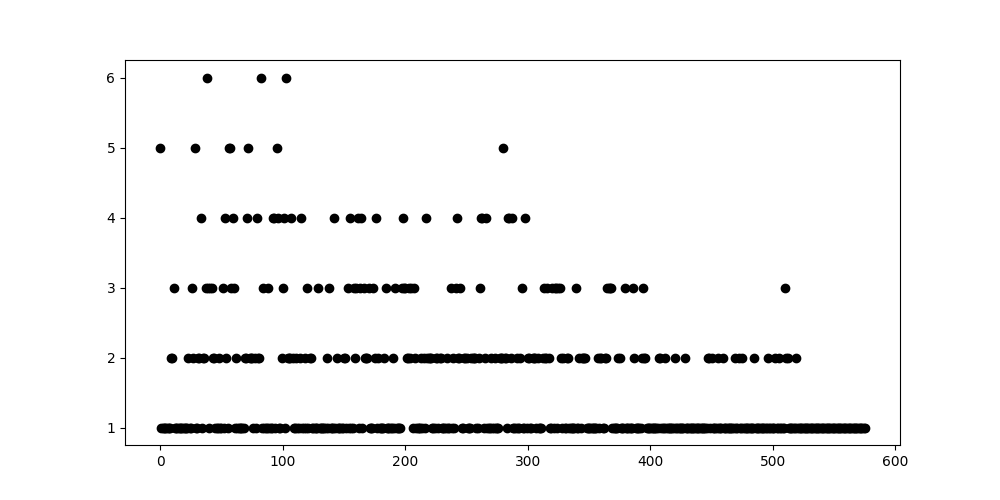

In [37]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(num_enteredGames,'ko')

In [38]:
ind_max = np.where(np.array(num_enteredGames)==6)
users_signup_ttrpg[ind_max]

array(['314827', '553492', '62531'], dtype=object)

In [39]:
for user in users_signup_ttrpg[ind_max]:
    print(signedGames_ttrpg[signedGames_ttrpg.username == user].shape[0])

14
13
20


## How many signedGames in each slot

In [40]:
start_times = signedGames_ttrpg.datetime

In [41]:
num_signedGames_in_slot = signedGames_ttrpg.groupby(by='datetime').username.count()

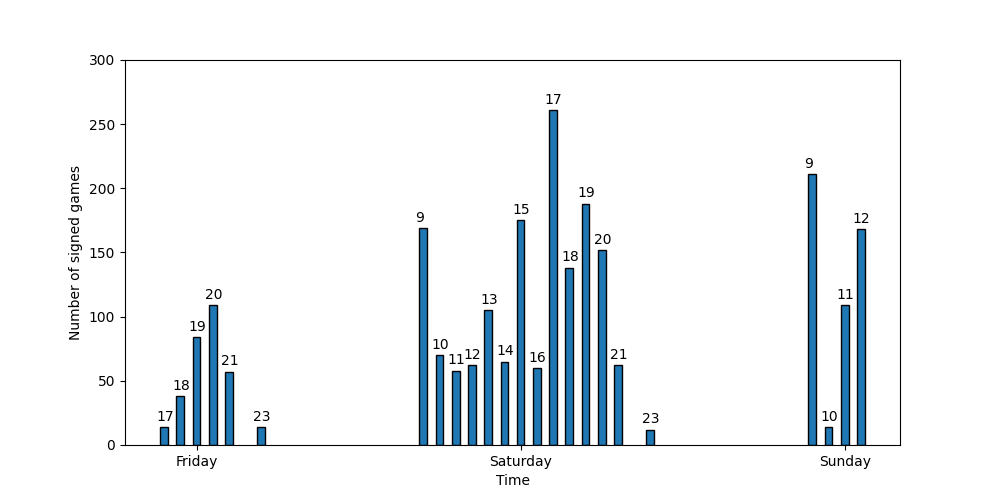

In [42]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.bar(num_signedGames_in_slot.index, num_signedGames_in_slot, width=0.02, edgecolor='k', linewidth=1)

ax.set_ylabel('Number of signed games')
ax.set_xlabel('Time')
ax.set_xticks([datetime(2022, 7, 29, 19, 0, 0), datetime(2022, 7, 30, 15, 0, 0), datetime(2022, 7, 31, 11, 0, 0)])
ax.xaxis.set_major_formatter(mdates.DateFormatter('%A'))
ax.set_ylim([0, 300])

for i, n in enumerate(num_signedGames_in_slot):
    ax.text(num_signedGames_in_slot.index[i]-timedelta(minutes=30), n+5, str(num_signedGames_in_slot.index[i].hour))


## How many players / slot

In [43]:
num_players_in_slot = signups_ttrpg.groupby(by='datetime').count().username

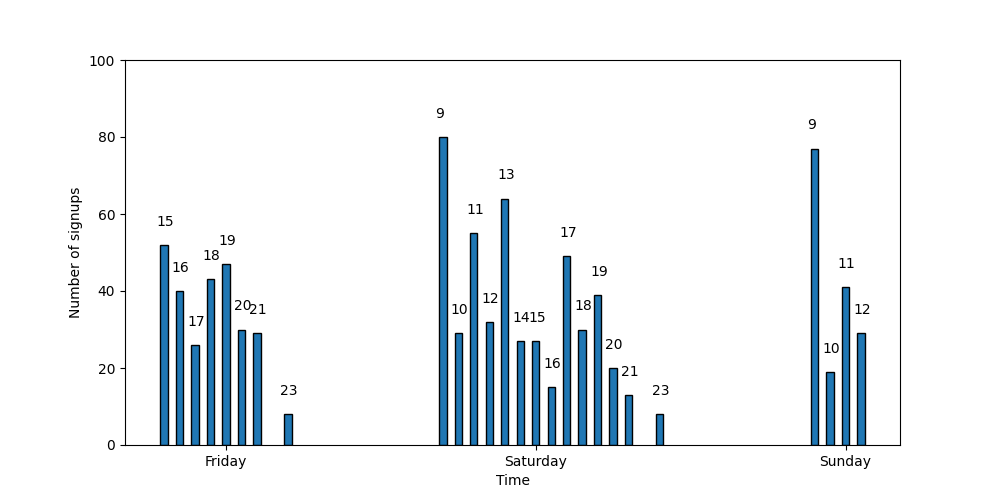

In [44]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.bar(num_players_in_slot.index, num_players_in_slot, width=0.02, edgecolor='k', linewidth=1)

ax.set_ylabel('Number of signups')
ax.set_xlabel('Time')
ax.set_xticks([datetime(2022, 7, 29, 19, 0, 0), datetime(2022, 7, 30, 15, 0, 0), datetime(2022, 7, 31, 11, 0, 0)])
ax.xaxis.set_major_formatter(mdates.DateFormatter('%A'))
ax.set_ylim([0, 100])

for i, n in enumerate(num_players_in_slot):
    ax.text(num_players_in_slot.index[i]-timedelta(minutes=30), n+5, str(num_players_in_slot.index[i].hour))


In [73]:
maxPlayers = games_ttrpg.groupby(by='datetime').sum().maxAttendance
maxPlayers

datetime
2022-07-29 15:00:00     80
2022-07-29 16:00:00     41
2022-07-29 17:00:00     35
2022-07-29 18:00:00     43
2022-07-29 19:00:00     53
2022-07-29 20:00:00     31
2022-07-29 21:00:00     29
2022-07-29 23:00:00      8
2022-07-30 09:00:00    102
2022-07-30 10:00:00     32
2022-07-30 11:00:00     58
2022-07-30 12:00:00     32
2022-07-30 13:00:00     70
2022-07-30 14:00:00     28
2022-07-30 15:00:00     27
2022-07-30 16:00:00     15
2022-07-30 17:00:00     49
2022-07-30 18:00:00     31
2022-07-30 19:00:00     41
2022-07-30 20:00:00     20
2022-07-30 21:00:00     13
2022-07-30 23:00:00      8
2022-07-31 09:00:00     97
2022-07-31 10:00:00     27
2022-07-31 11:00:00     41
2022-07-31 12:00:00     32
Name: maxAttendance, dtype: int64

In [89]:
xvalues = num_players_in_slot.index
increment = [i*6 for i in range(xvalues.shape[0])]
print(increment)
xvalues = [i + timedelta(hours=j) for i,j in zip(xvalues,increment)]

[0, 6, 12, 18, 24, 30, 36, 42, 48, 54, 60, 66, 72, 78, 84, 90, 96, 102, 108, 114, 120, 126, 132, 138, 144, 150]


In [94]:
time_ticks = pd.date_range(xvalues[0], xvalues[-1], freq='6H')

Text(2022-07-31 09:00:00, 275, 'Sunday')

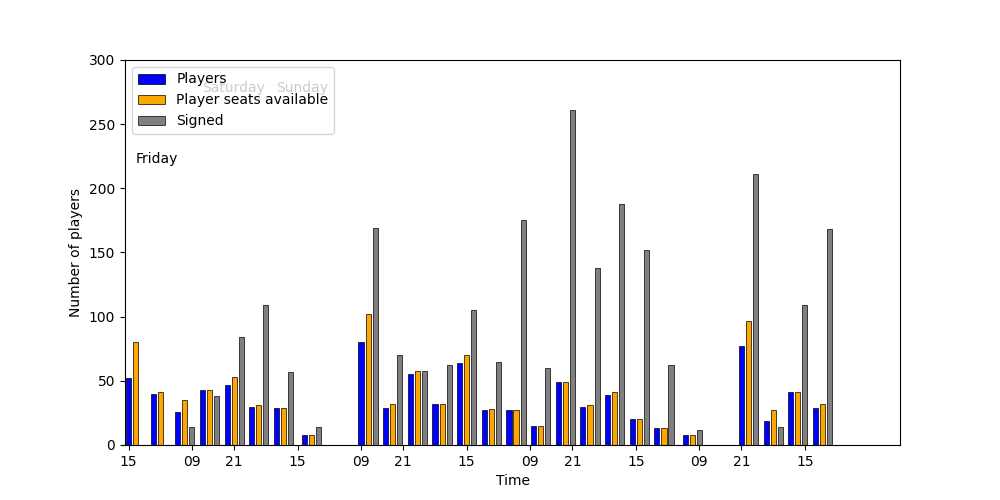

In [96]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.bar([i for i in xvalues], num_players_in_slot, width=0.06, edgecolor='k', linewidth=0.5, color='blue', label='Players')
ax.bar([i+timedelta(minutes=2*60) for i in xvalues], maxPlayers, width=0.06, edgecolor='k', linewidth=0.5, color='orange', label='Player seats available')
ax.bar([i+timedelta(minutes=4*60) for i in xvalues[2:]], num_signedGames_in_slot, width=0.06, edgecolor='k', linewidth=0.5, color='gray', label='Signed')

ax.set_ylabel('Number of players')
ax.set_xlabel('Time')
ax.set_xticks(time_ticks[time_ticks.hour >= 9][::2])
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H'))
ax.set_ylim([0, 300])
ax.set_xlim([datetime(2022,7,29,14,0,0), datetime(2022,8,7,18)])
ax.legend(loc='upper left')
ax.text(datetime(2022,7,29,17,00), 220, 'Friday')
ax.text(datetime(2022,7,30,12,00), 275, 'Saturday')
ax.text(datetime(2022,7,31,9,00), 275, 'Sunday')

## How many players spots / slot

In [47]:
games_in_slot_sum = games_ttrpg.groupby(by='datetime').sum()

In [48]:
games_in_slot_sum

,maxAttendance,minAttendance,mins,popularity,revolvingDoor
datetime,,,,,
2022-07-29 15:00:00,80,36,3840,0,4
2022-07-29 16:00:00,41,18,1560,0,0
2022-07-29 17:00:00,35,19,1440,8,2
2022-07-29 18:00:00,43,21,1800,30,0
2022-07-29 19:00:00,53,29,2100,40,1
2022-07-29 20:00:00,31,17,1670,31,0
2022-07-29 21:00:00,29,14,1080,27,0
2022-07-29 23:00:00,8,2,60,8,0
2022-07-30 09:00:00,102,46,4920,70,4


Text(2022-07-31 09:00:00, 101, 'Sunday')

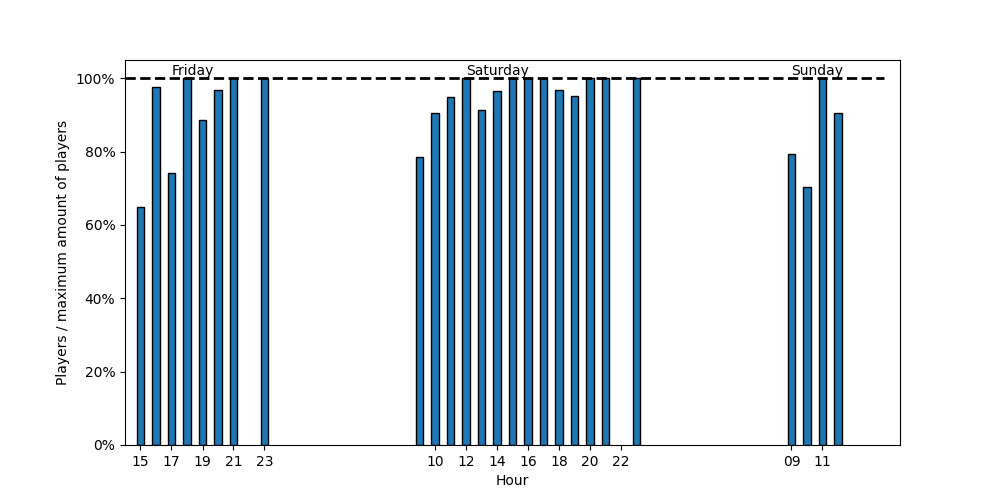

In [49]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.bar(num_players_in_slot.index, num_players_in_slot/games_in_slot_sum['maxAttendance']*100, width=0.02, edgecolor='k', linewidth=1)

ax.plot((datetime(2022,7,29,14), datetime(2022,7,31,15)), (100, 100), color='k', linestyle='--', linewidth=2)
ax.set_ylabel('Players / maximum amount of players')
ax.set_xlabel('Hour')
ax.set_xticks(time_ticks[time_ticks.hour >= 9][::2])
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H'))
ax.set_ylim([0, 105])
ax.set_xlim([datetime(2022,7,29,14,0,0), datetime(2022,7,31,16)])
ax.set_yticks(np.linspace(0,100,6))
ax.set_yticklabels([f'{int(n)}%' for n in ax.get_yticks()])
ax.text(datetime(2022,7,29,17,00), 101, 'Friday')
ax.text(datetime(2022,7,30,12,00), 101, 'Saturday')
ax.text(datetime(2022,7,31,9,00), 101, 'Sunday')

## how many games were started

In [50]:
signups_ttrpg.columns

Index(['username', 'priority', 'time', 'message', 'game.gameId', 'count',
       'createdAt', 'updatedAt', 'datetime'],
      dtype='object')

In [51]:
players_in_game = signups_ttrpg.groupby(by='game.gameId').count().username

In [52]:
games_by_id = games_ttrpg.set_index(games_ttrpg.gameId)

In [53]:
print(f'{len(set(games_by_id.index).difference(set(players_in_game.index)))} games of {games_by_id.shape[0]} did not start ({np.round(len(set(games_by_id.index).difference(set(players_in_game.index)))/games_by_id.shape[0]*100,1)}%)')

8 games of 192 did not start (4.2%)


In [54]:
minAttendance = []
maxAttendance = []
fillPerc = []
dt = []
for i,g in enumerate(players_in_game):
    minAttendance.append(games_by_id[games_by_id.index == players_in_game.index[i]].minAttendance.to_numpy()[0])
    maxAttendance.append(games_by_id[games_by_id.index == players_in_game.index[i]].maxAttendance.to_numpy()[0])
    fillPerc.append(g/games_by_id[games_by_id.index == players_in_game.index[i]].maxAttendance.to_numpy()[0])
    dt.append(games_by_id[games_by_id.index == players_in_game.index[i]].datetime.to_numpy()[0])

In [55]:
players_in_game_data = pd.DataFrame(data={'game': players_in_game.index, 'players': players_in_game.to_numpy(), 'maxPlayers': maxAttendance,
'minPlayers': minAttendance, 'fillPercent': fillPerc, 'datetime': dt})

In [56]:
players_in_game_data.head()

,game,players,maxPlayers,minPlayers,fillPercent,datetime
0,p4847,5,5,2,1.0,2022-07-30 10:00:00
1,p4850,5,5,3,1.0,2022-07-30 09:00:00
2,p4867,5,5,3,1.0,2022-07-29 15:00:00
3,p4955,5,5,1,1.0,2022-07-31 09:00:00
4,p4956,5,5,1,1.0,2022-07-29 21:00:00


In [57]:
print(f'Average fill percent of games is {np.round(players_in_game_data.fillPercent.mean()*100,1)}% (median: {np.round(players_in_game_data.fillPercent.median()*100,1)}%)')

Average fill percent of games is 96.1% (median: 100.0%)


In [58]:
num_max = players_in_game_data[players_in_game_data.players == players_in_game_data.maxPlayers].shape[0]
num_all_games = players_in_game_data.shape[0]
print(f'{num_max} games started with maximum number of players ({np.round(num_max/num_all_games*100,1)})%')

164 games started with maximum number of players (89.1)%


In [59]:
num_min = players_in_game_data[players_in_game_data.players == players_in_game_data.minPlayers].shape[0]
num_all_games = players_in_game_data.shape[0]
print(f'{num_min} games started with minimum number of players ({np.round(num_min/num_all_games*100,1)})%')

15 games started with minimum number of players (8.2)%


In [60]:
players_in_game_data_by_datetime = players_in_game_data.groupby(by='datetime').mean()

In [61]:
players_in_game_data_by_datetime.head()

,players,maxPlayers,minPlayers,fillPercent
datetime,,,,
2022-07-29 15:00:00,4.727273,5.545455,2.909091,0.890909
2022-07-29 16:00:00,4.375000,5.125000,2.250000,0.865625
2022-07-29 17:00:00,4.428571,4.428571,2.142857,1.000000
2022-07-29 18:00:00,5.375000,5.375000,2.625000,1.000000
2022-07-29 19:00:00,4.700000,4.700000,2.700000,1.000000


Text(2022-07-31 09:00:00, 101, 'Sunday')

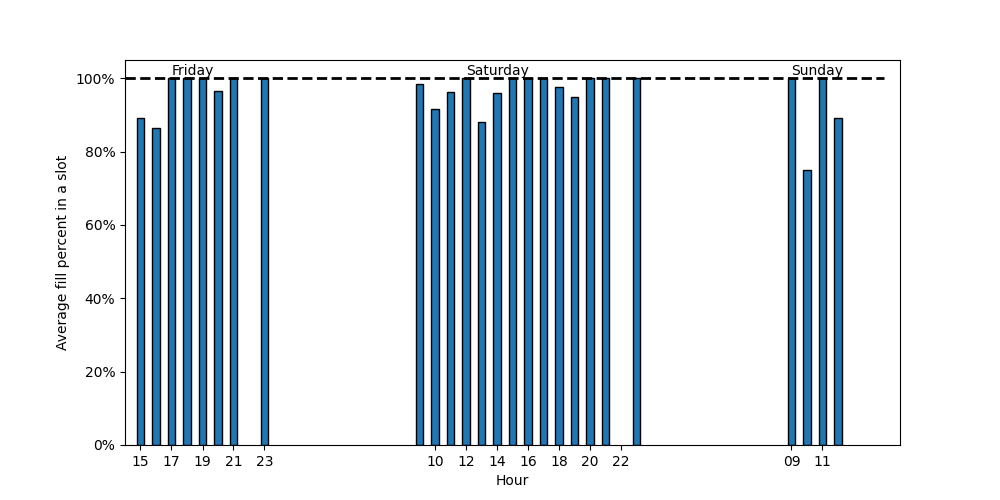

In [62]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.bar(players_in_game_data_by_datetime.index, players_in_game_data_by_datetime.fillPercent*100, width=0.02, edgecolor='k', linewidth=1)

ax.plot((datetime(2022,7,29,14), datetime(2022,7,31,15)), (100, 100), color='k', linestyle='--', linewidth=2)
ax.set_ylabel('Average fill percent in a slot')
ax.set_xlabel('Hour')
ax.set_xticks(time_ticks[time_ticks.hour >= 9][::2])
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H'))
ax.set_ylim([0, 105])
ax.set_xlim([datetime(2022,7,29,14,0,0), datetime(2022,7,31,16)])
ax.set_yticks(np.linspace(0,100,6))
ax.set_yticklabels([f'{int(n)}%' for n in ax.get_yticks()])
ax.text(datetime(2022,7,29,17,00), 101, 'Friday')
ax.text(datetime(2022,7,30,12,00), 101, 'Saturday')
ax.text(datetime(2022,7,31,9,00), 101, 'Sunday')